# Business Understanding

The goal of this project is to look at aviation accidents that occurred in the past years from 1962 to 2022. The purpose of this analysis is to allow our clients make informed decisions on what aircraft to purchase.

# Data Understanding

In this section we will get an  overview of what data we have. This should allow us in better preparing in tackling the goal of the project.

In [5]:
#Importing the necessary python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
#Importing and displaying the first data set 
aviation_df=pd.read_csv("AviationData.csv",encoding='cp1252',low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
aviation_df.info() # get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
aviation_df.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# display the columns in this dataset
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Preparation

In this section we clean the data.

In [12]:
# check for missing data
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [13]:
#dropping columns with more than 30% of missing data 
threshold = 0.3
min_count = int((1 - threshold) * len(aviation_df))
aviation_df = aviation_df.dropna(axis=1, thresh=min_count)

In [14]:
aviation_df.shape

(88889, 22)

In [15]:
#check for duplicates 
aviation_df_duplicates=aviation_df.duplicated()
aviation_df_duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [16]:
#To better understand the columns, replace full stop with hivens on column names in df1
aviation_df.columns = aviation_df.columns.str.replace('.', '_')
aviation_df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Registration_Number', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Report_Status', 'Publication_Date'],
      dtype='object')

In [17]:
#convert Event_Date column to datetime format
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date'])

In [18]:
#dropping rows with missing entries 
aviation_df = aviation_df.dropna()
aviation_df.shape

(51131, 22)

In [19]:
# checking if all misssing rows have been dropped
aviation_df.isnull().sum()

Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Registration_Number       0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Report_Status             0
Publication_Date          0
dtype: int64

In [20]:
aviation_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Publication_Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,...,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,01-01-1982


In [21]:
Countrycount = aviation_df.groupby('Country').size()
percentage = (Countrycount / Countrycount.sum()) * 100
print(percentage)

Country
ATLANTIC OCEAN     0.093877
Afghanistan        0.001956
American Samoa     0.003912
Angola             0.003912
Antarctica         0.001956
                    ...    
UN                 0.009779
United Kingdom     0.001956
United States     99.047545
Venezuela          0.003912
West Indies        0.007823
Length: 79, dtype: float64


In [22]:
#For data uniformity, ensure all data under 'Make' and 'Model' start with a capital letter
aviation_df['Make'] = aviation_df['Make'].str.title()
aviation_df['Model'] = aviation_df['Model'].str.title()

In [23]:
# Create a column called Year from 
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date'], format='%Y-%m-%d')
aviation_df['Year']=aviation_df['Event_Date'].dt.strftime('%Y')

In [24]:
aviation_df['Year']

1        1962
3        1977
6        1981
7        1982
8        1982
         ... 
88639    2022
88647    2022
88661    2022
88735    2022
88767    2022
Name: Year, Length: 51131, dtype: object

In [25]:
# Specify the file path to export df
file_path = 'C:/Users/ChrisKarta/Documents/MORINGA/Phase1/Assessments/project-phase-1/aviationdatacleaned.csv'
# Export as CSV
aviation_df.to_csv(file_path, index=False)

# Data Analysis

In here we analyse the cleaned data.

In [28]:
#Top 10 makes of aircraft in this dataset.
top_10_makes = aviation_df['Make'].value_counts(normalize=True).head(10) * 100
print(top_10_makes)

Make
Cessna      32.743346
Piper       18.063406
Beech        6.221275
Bell         2.740021
Mooney       1.591989
Grumman      1.451174
Bellanca     1.304492
Boeing       1.075668
Hughes       1.069801
Robinson     1.026774
Name: proportion, dtype: float64


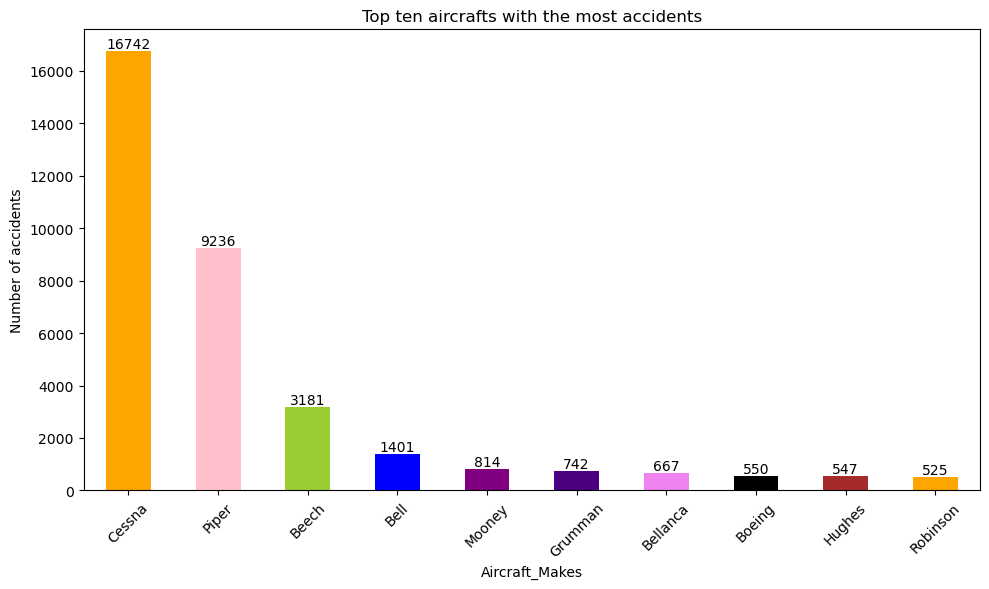

In [29]:
# Let's generate a bar graph for the above data

## getting a count of every aircraft make and sorting them from top 10
top_ten_aircrafts_makes_accidents = aviation_df['Make'].value_counts().head(10)
# getting colours
colors = ['orange','pink','yellow' 'green', 'blue', 'purple','indigo','violet','black','brown']
# Plotting the a bar graph of to 10 aircrafts
plt.figure(figsize=(10, 6))
bar=top_ten_aircrafts_makes_accidents.plot(kind='bar', color=colors)
#capture number of accidents on top of the bar
for p in bar.patches:
            bar.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
      
plt.title('Top ten aircrafts with the most accidents')
plt.xlabel('Aircraft_Makes')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Findings

* Cessna is the aircraft make with the most accidents
* The top 3 aircraft with most accidents are Cessna, Piper and Beech

## Further analysis on the aircraft makes with most accidents since 2000

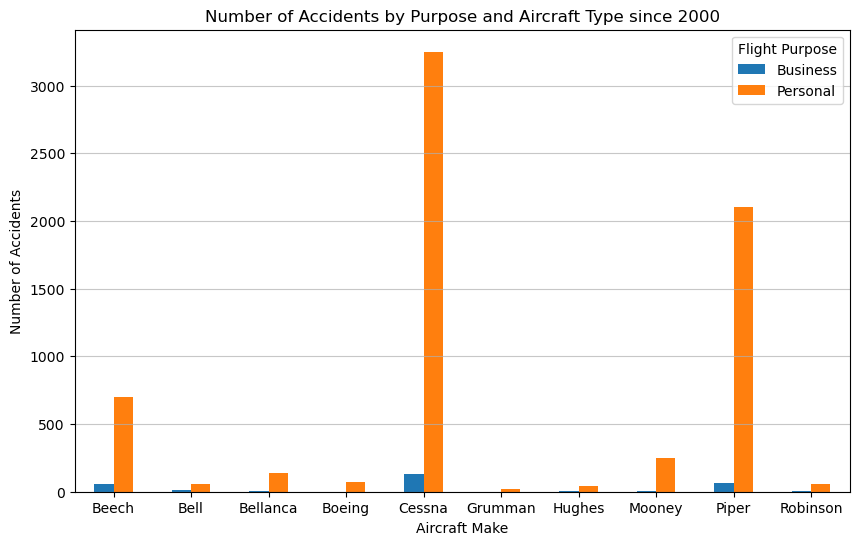

In [32]:
# convert the data type for Year to int
aviation_df['Year'] = aviation_df['Year'].astype(int)

# Genrate data for top 5 aircraft makes with most accidents since 2010
df = aviation_df[(aviation_df['Year'] >= 2000) & (aviation_df['Make'].isin(['Cessna', 'Piper', 'Beech','Bell','Mooney', 'Grumman', 'Bellanca', 'Boeing', 'Hughes', 'Robinson'])) & (aviation_df['Purpose_of_flight'].isin(['Business', 'Personal']))]

# Group the data by 'Make' and 'Purpose_of_flight' and then count the number of accidents
grouped_data = df.groupby(['Make', 'Purpose_of_flight']).size().unstack()

# Plotting the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))

# Labels for the bar chart
plt.title('Number of Accidents by Purpose and Aircraft Type since 2000')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title="Flight Purpose")
plt.grid(axis='y', linestyle='-', alpha=0.7)
# Show the plot
plt.show()

## Findings

* Top 5 aircraft makes with most number of accidents are caused by personal flight use of the aircraft
* Most of the aircraft accidents are seen on Cessna.
* Boeing is the safest aircraft make to buy for business flight.
* Grumman is the safest aircraft for personal flight.

## Graph of injuries amongst the top 10 aircraft

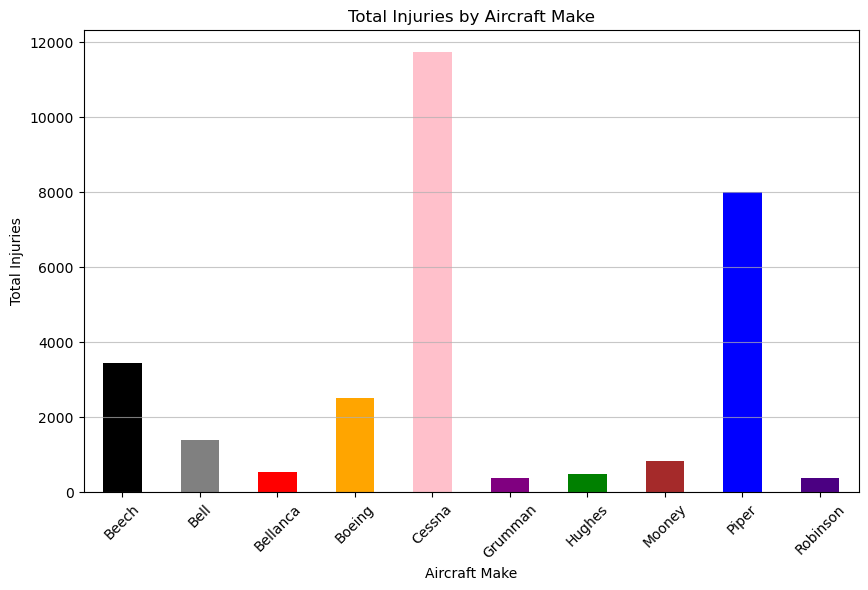

In [35]:

# Computation of total injuries
aviation_df['Total_Injuries'] = aviation_df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries']].sum(axis=1)

# Group data by 'Make' 
injuries_group = aviation_df.groupby('Make')['Total_Injuries'].sum()

# List all aircraft make
Aircraft_make = ['Cessna', 'Piper', 'Beech','Bell','Mooney', 'Grumman', 'Bellanca', 'Boeing', 'Hughes', 'Robinson']
injuries_group  = injuries_group [injuries_group .index.isin(Aircraft_make)]

# Plot the chart
plt.figure(figsize=(10, 6))
bars = injuries_group.plot(kind='bar', color=['black', 'grey', 'red', 'orange','pink', 'purple', 'green', 'brown', 'blue', 'indigo'])
# Labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Aircraft Make')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Show the chart
plt.show()

## Findings

* The higher the number of accidents, the more injuries expected.
* Boeing and Grumman have the least injuries reported.

# Conclusion

* Cessna, Piper and Beech aircraft are prone to the highest accidents and injuries. However, this is mostly with aircraft used for personal flight and can be attributed to various other factors.
* For busines and personal flight, the safest aircraft to go for is Boeing and Grumman respectively.
* Boeing and Grumman are the safest aircraft makes due to the low number of injuries.


# Recommendation

Go with Boeing and Grumman since these are the safest aircraft.